In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [4]:
#load_data
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

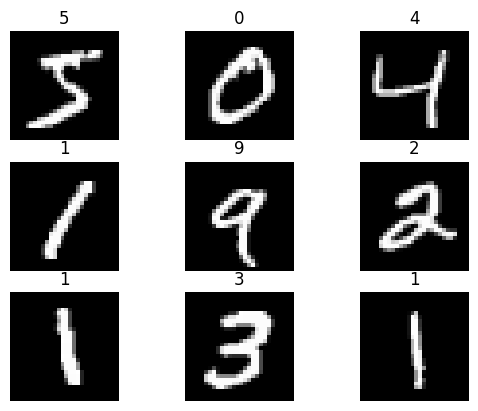

In [22]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_train[i],cmap='gray')
    plt.title(y_train[i])

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [82]:
model = keras.Sequential([
    keras.layers.Conv2D(16,(3,3),input_shape = (28,28,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1200,activation='relu'),
    keras.layers.Dense(600,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [83]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
history = model.fit(x_train,y_train,
          epochs=4,
          validation_split = 0.33)

Epoch 1/4
1257/1257 [==============================] - 59s 46ms/step - loss: 0.1475 - accuracy: 0.9540 - val_loss: 0.0794 - val_accuracy: 0.9776
Epoch 2/4
1257/1257 [==============================] - 60s 47ms/step - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0750 - val_accuracy: 0.9811
Epoch 3/4
1257/1257 [==============================] - 56s 45ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0541 - val_accuracy: 0.9853
Epoch 4/4
1257/1257 [==============================] - 56s 45ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0530 - val_accuracy: 0.9857


In [85]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0468 - accuracy: 0.9874


[0.04676932841539383, 0.9873999953269958]

In [86]:
model.save('model/mnist_model.h5')

In [88]:
sample = np.array([x_test[1]])
np.argmax(model.predict(sample))

1/1 [==============================] - 0s 40ms/step


2

In [108]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [109]:
history.history['accuracy']

[0.9540287256240845, 0.984203577041626, 0.9889051914215088, 0.9913181662559509]

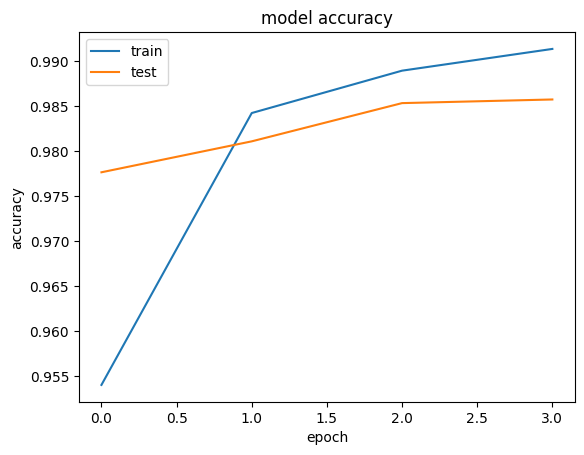

In [105]:
# plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

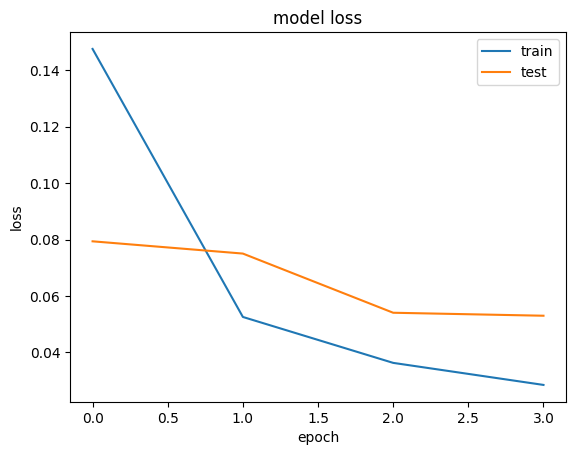

In [106]:
# plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [43]:
m = keras.models.load_model('model/mnist_model.h5')

In [47]:
import cv2
img = cv2.imread('sample_img/seven.png')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray_img,dsize=(28,28))
gray_img = gray_img.astype('float32')
gray_img[gray_img == 0] = 255.0
gray_img[gray_img == 247] = 0
# gray_img /= 255

gray_img = np.array([gray_img])
# plt.imshow(gray_img,cmap='gray')
# plt.show()

In [48]:
np.argmax(m.predict(gray_img))

1/1 [==============================] - 0s 133ms/step


6